In [134]:
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn as sns
import scipy as scp
import matplotlib.pyplot as plt
import math

from sklearn.decomposition import PCA

# **Part 1: Data Cleansing**

Read the unclean iris data set provided.

In [3]:
iris_data_unclean = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EN605.621/pa2/iris_6_features_for_cleansing.csv')

In [4]:
iris_data_unclean.head()

,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
0,5.1,3.5,1.4,0.2,1.611281,2.981148,1
1,4.9,3.0,1.4,0.2,1.295847,2.210908,1
2,4.7,NaN,1.3,0.2,1.685578,3.114562,1
3,4.6,3.1,1.5,0.2,1.546064,2.714977,1
4,5.0,3.6,1.4,0.2,1.501464,2.815603,1


In [5]:
iris_data_unclean.describe()

,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
count,147.000000,147.000000,147.000000,149.000000,148.000000,148.000000,150.000000
mean,5.845578,3.053741,3.751701,1.205369,1.375071,3.523958,2.000000
std,0.834958,0.437188,1.760151,0.761292,0.135347,0.900837,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.120668,1.976229,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.270109,2.745057,1.000000
50%,5.800000,3.000000,4.300000,1.300000,1.382528,3.441192,2.000000
75%,6.400000,3.300000,5.100000,1.800000,1.473925,4.364670,3.000000
max,7.900000,4.400000,6.900000,2.500000,1.685578,5.104838,3.000000


Values seem to be in good magnitude comapared to each other and do not need scaling. Looks like there are missing values in all features and might need to some imputing. After imputing we shall check if there are duplicates.

Check if there are null values for each feature


In [6]:
iris_data_unclean[iris_data_unclean['sepal length'].isnull()]

,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
31,NaN,3.4,1.5,0.4,1.582770,2.916998,1
94,NaN,2.7,4.2,1.3,1.324864,3.313255,2
148,NaN,3.4,5.4,2.3,1.131173,4.027495,3


In [7]:
iris_data_unclean[iris_data_unclean['sepal width'].isnull()]

,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
2,4.7,NaN,1.3,0.2,1.685578,3.114562,1
51,6.4,NaN,4.5,1.5,1.473090,3.815652,2
132,6.4,NaN,5.6,2.2,1.150044,4.053020,3


In [8]:
iris_data_unclean[iris_data_unclean['petal length'].isnull()]

,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
12,4.8,3.0,NaN,0.1,1.526365,2.794599,1
104,6.5,3.0,NaN,2.2,1.320333,4.432049,3
141,6.9,3.1,NaN,2.3,1.469114,4.710281,3


In [9]:
iris_data_unclean[iris_data_unclean['petal width'].isnull()]

,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
36,5.5,3.5,1.3,NaN,1.188148,2.034879,1


In [10]:
iris_data_unclean[iris_data_unclean['New Feature 1'].isnull()]

,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
63,6.1,2.9,4.7,1.4,NaN,3.287308,2
121,5.6,2.8,4.9,2.0,NaN,4.554019,3


In [11]:
iris_data_unclean[iris_data_unclean['New Feature 2'].isnull()]

,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
20,5.4,3.4,1.7,0.2,1.426801,NaN,1
83,6.0,2.7,5.1,1.6,1.313326,NaN,2


 We will impute the null values using Linear Regression. 

First create a dataset of non-null values.

In [12]:
iris_features_not_null = iris_data_unclean.dropna().iloc[:,:6]
print(iris_features_not_null.shape)

(136, 6)


Then extract the features and target for each feature that will be used to train a linear regression model.

In [13]:
iris_sepal_length_features = iris_features_not_null.iloc[:,1:6]
iris_sepal_length_features.head()

,sepal width,petal length,petal width,New Feature 1,New Feature 2
0,3.5,1.4,0.2,1.611281,2.981148
1,3.0,1.4,0.2,1.295847,2.210908
3,3.1,1.5,0.2,1.546064,2.714977
4,3.6,1.4,0.2,1.501464,2.815603
5,3.9,1.7,0.4,1.325835,2.235803


In [14]:
iris_sepal_length_target = iris_features_not_null['sepal length']
iris_sepal_length_target.shape

(136,)

In [15]:
sepal_width_features = ['sepal length', 'petal length', 'petal width', 'New Feature 1', 'New Feature 2']
iris_sepal_width_features = iris_features_not_null[sepal_width_features]
iris_sepal_width_features.head()

,sepal length,petal length,petal width,New Feature 1,New Feature 2
0,5.1,1.4,0.2,1.611281,2.981148
1,4.9,1.4,0.2,1.295847,2.210908
3,4.6,1.5,0.2,1.546064,2.714977
4,5.0,1.4,0.2,1.501464,2.815603
5,5.4,1.7,0.4,1.325835,2.235803


In [16]:
iris_sepal_width_target = iris_features_not_null['sepal width']
iris_sepal_width_target.shape

(136,)

In [17]:
petal_length_features = ['sepal length', 'sepal width', 'petal width', 'New Feature 1', 'New Feature 2']
iris_petal_length_features = iris_features_not_null[petal_length_features]
iris_petal_length_features.head()

,sepal length,sepal width,petal width,New Feature 1,New Feature 2
0,5.1,3.5,0.2,1.611281,2.981148
1,4.9,3.0,0.2,1.295847,2.210908
3,4.6,3.1,0.2,1.546064,2.714977
4,5.0,3.6,0.2,1.501464,2.815603
5,5.4,3.9,0.4,1.325835,2.235803


In [18]:
iris_petal_length_target = iris_features_not_null['petal length']
iris_petal_length_target.shape

(136,)

In [19]:
petal_width_features = ['sepal length', 'sepal width', 'petal length', 'New Feature 1', 'New Feature 2']
iris_petal_width_features = iris_features_not_null[petal_width_features]
iris_petal_width_features.head()

,sepal length,sepal width,petal length,New Feature 1,New Feature 2
0,5.1,3.5,1.4,1.611281,2.981148
1,4.9,3.0,1.4,1.295847,2.210908
3,4.6,3.1,1.5,1.546064,2.714977
4,5.0,3.6,1.4,1.501464,2.815603
5,5.4,3.9,1.7,1.325835,2.235803


In [20]:
iris_petal_width_target = iris_features_not_null['petal width']
iris_petal_width_target.shape

(136,)

In [21]:
new_1_features = ['sepal length', 'sepal width', 'petal length', 'petal width', 'New Feature 2']
iris_new_1_features = iris_features_not_null[new_1_features]
iris_new_1_features.head()

,sepal length,sepal width,petal length,petal width,New Feature 2
0,5.1,3.5,1.4,0.2,2.981148
1,4.9,3.0,1.4,0.2,2.210908
3,4.6,3.1,1.5,0.2,2.714977
4,5.0,3.6,1.4,0.2,2.815603
5,5.4,3.9,1.7,0.4,2.235803


In [22]:
iris_new_1_target = iris_features_not_null['New Feature 1']
iris_new_1_target.shape

(136,)

In [23]:
new_2_features = ['sepal length', 'sepal width', 'petal length', 'petal width', 'New Feature 1']
iris_new_2_features = iris_features_not_null[new_2_features]
iris_new_2_features.head()

,sepal length,sepal width,petal length,petal width,New Feature 1
0,5.1,3.5,1.4,0.2,1.611281
1,4.9,3.0,1.4,0.2,1.295847
3,4.6,3.1,1.5,0.2,1.546064
4,5.0,3.6,1.4,0.2,1.501464
5,5.4,3.9,1.7,0.4,1.325835


In [24]:
iris_new_2_target = iris_features_not_null['New Feature 2']
iris_new_2_target.shape

(136,)

In [25]:
from sklearn.linear_model import LinearRegression
def train_linear_regression_model(x, y):
  linear_regression = LinearRegression()
  linear_regression.fit(x, y)
  return linear_regression

In [49]:
iris_data_is_null = iris_data_unclean[iris_data_unclean.isnull().any(axis=1)]

sepal length     11
sepal width      11
petal length     11
petal width      13
New Feature 1    12
New Feature 2    12
class            14
dtype: int64

In [50]:
sepal_length_linear_reg_model = train_linear_regression_model(iris_sepal_length_features, iris_sepal_length_target)

In [51]:
sepal_length_null = iris_data_is_null[iris_data_is_null['sepal length'].isnull()]
print(sepal_length_null.values)
sepal_length_impute_values = sepal_length_linear_reg_model.predict(sepal_length_null.iloc[:,1:6]) 
sepal_length_impute_values

[[       nan 3.4        1.5        0.4        1.58276971 2.91699779
  1.        ]
 [       nan 2.7        4.2        1.3        1.32486361 3.31325475
  2.        ]
 [       nan 3.4        5.4        2.3        1.13117322 4.02749526
  3.        ]]


array([4.92986945, 5.94414636, 6.56612879])

In [52]:
sepal_width_linear_reg_model = train_linear_regression_model(iris_sepal_width_features, iris_sepal_width_target)

In [53]:
sepal_width_null = iris_data_is_null[iris_data_is_null['sepal width'].isnull()]
print(sepal_width_null.values)
sepal_width_impute_values = sepal_width_linear_reg_model.predict(sepal_width_null[sepal_width_features]) 
sepal_width_impute_values

[[4.7               nan 1.3        0.2        1.68557819 3.11456249
  1.        ]
 [6.4               nan 4.5        1.5        1.4730896  3.81565165
  2.        ]
 [6.4               nan 5.6        2.2        1.15004358 4.05301993
  3.        ]]


array([3.32187821, 3.14948886, 2.81638955])

In [54]:
petal_length_linear_reg_model = train_linear_regression_model(iris_petal_length_features, iris_petal_length_target)

In [55]:
petal_length_null = iris_data_is_null[iris_data_is_null['petal length'].isnull()]
print(petal_length_null.values)
petal_length_impute_values = petal_length_linear_reg_model.predict(petal_length_null[petal_length_features]) 
print(petal_length_impute_values)

[[4.8        3.                nan 0.1        1.52636464 2.7945989
  1.        ]
 [6.5        3.                nan 2.2        1.32033284 4.4320489
  3.        ]
 [6.9        3.1               nan 2.3        1.46911371 4.71028136
  3.        ]]
[1.48766421 5.7144479  6.02751857]


In [56]:
petal_width_linear_reg_model = train_linear_regression_model(iris_petal_width_features, iris_petal_width_target)

In [57]:
petal_width_null = iris_data_is_null[iris_data_is_null['petal width'].isnull()]
print(petal_width_null.values)
petal_width_impute_values = petal_width_linear_reg_model.predict(petal_width_null[petal_width_features]) 
print(petal_width_impute_values)

[[5.5        3.5        1.3               nan 1.1881484  2.03487861
  1.        ]]
[0.1294261]


In [58]:
new_1_linear_reg_model = train_linear_regression_model(iris_new_1_features, iris_new_1_target)

In [59]:
new_1_null = iris_data_is_null[iris_data_is_null['New Feature 1'].isnull()]
print(new_1_null.values)
new_1_impute_values = new_1_linear_reg_model.predict(new_1_null[new_1_features]) 
print(new_1_impute_values)
new_1_null

[[6.1        2.9        4.7        1.4               nan 3.28730848
  2.        ]
 [5.6        2.8        4.9        2.                nan 4.55401917
  3.        ]]
[1.21574035 1.40782779]


,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
63,6.1,2.9,4.7,1.4,NaN,3.287308,2
121,5.6,2.8,4.9,2.0,NaN,4.554019,3


In [60]:
new_2_linear_reg_model = train_linear_regression_model(iris_new_2_features, iris_new_2_target)

In [61]:
new_2_null = iris_data_is_null[iris_data_is_null['New Feature 2'].isnull()]
print(new_2_null.values)
new_2_impute_values = new_2_linear_reg_model.predict(new_2_null[new_2_features]) 
print(new_2_impute_values)

[[5.4        3.4        1.7        0.2        1.42680129        nan
  1.        ]
 [6.         2.7        5.1        1.6        1.31332598        nan
  2.        ]]
[2.50544283 4.01895526]


Impute the generated values

In [62]:
#Impute the generated values
iris_data_clean = iris_data_unclean.copy()
were_null = iris_data_clean['sepal length'].isnull()
print(iris_data_clean[were_null])
iris_data_clean['sepal length'].fillna(pd.DataFrame(sepal_length_impute_values, index=iris_data_clean[were_null].index)[0], inplace = True)
print(sepal_length_impute_values)
iris_data_clean[were_null]

     sepal length  sepal width  ...  New Feature 2  class
31            NaN          3.4  ...       2.916998      1
94            NaN          2.7  ...       3.313255      2
148           NaN          3.4  ...       4.027495      3

[3 rows x 7 columns]
[4.92986945 5.94414636 6.56612879]


,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
31,4.929869,3.4,1.5,0.4,1.582770,2.916998,1
94,5.944146,2.7,4.2,1.3,1.324864,3.313255,2
148,6.566129,3.4,5.4,2.3,1.131173,4.027495,3


In [63]:
were_null = iris_data_clean['sepal width'].isnull()
print(iris_data_clean[were_null])
iris_data_clean['sepal width'].fillna(pd.DataFrame(sepal_width_impute_values, index=iris_data_clean[were_null].index)[0], inplace = True)
print(sepal_width_impute_values)
iris_data_clean[were_null]

     sepal length  sepal width  ...  New Feature 2  class
2             4.7          NaN  ...       3.114562      1
51            6.4          NaN  ...       3.815652      2
132           6.4          NaN  ...       4.053020      3

[3 rows x 7 columns]
[3.32187821 3.14948886 2.81638955]


,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
2,4.7,3.321878,1.3,0.2,1.685578,3.114562,1
51,6.4,3.149489,4.5,1.5,1.473090,3.815652,2
132,6.4,2.816390,5.6,2.2,1.150044,4.053020,3


In [64]:
were_null = iris_data_clean['petal length'].isnull()
print(iris_data_clean[were_null])
iris_data_clean['petal length'].fillna(pd.DataFrame(petal_length_impute_values, index=iris_data_clean[were_null].index)[0], inplace = True)
print(petal_length_impute_values)
iris_data_clean[were_null]

     sepal length  sepal width  ...  New Feature 2  class
12            4.8          3.0  ...       2.794599      1
104           6.5          3.0  ...       4.432049      3
141           6.9          3.1  ...       4.710281      3

[3 rows x 7 columns]
[1.48766421 5.7144479  6.02751857]


,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
12,4.8,3.0,1.487664,0.1,1.526365,2.794599,1
104,6.5,3.0,5.714448,2.2,1.320333,4.432049,3
141,6.9,3.1,6.027519,2.3,1.469114,4.710281,3


In [65]:
were_null = iris_data_clean['petal width'].isnull()
print(iris_data_clean[were_null])
iris_data_clean['petal width'].fillna(pd.DataFrame(petal_width_impute_values, index=iris_data_clean[were_null].index)[0], inplace = True)
print(petal_width_impute_values)
iris_data_clean[were_null]

    sepal length  sepal width  ...  New Feature 2  class
36           5.5          3.5  ...       2.034879      1

[1 rows x 7 columns]
[0.1294261]


,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
36,5.5,3.5,1.3,0.129426,1.188148,2.034879,1


In [66]:
were_null = iris_data_clean['New Feature 1'].isnull()
print(iris_data_clean[were_null])
iris_data_clean['New Feature 1'].fillna(pd.DataFrame(new_1_impute_values, index=iris_data_clean[were_null].index)[0], inplace = True)
print(new_1_impute_values)
iris_data_clean[were_null]

     sepal length  sepal width  ...  New Feature 2  class
63            6.1          2.9  ...       3.287308      2
121           5.6          2.8  ...       4.554019      3

[2 rows x 7 columns]
[1.21574035 1.40782779]


,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
63,6.1,2.9,4.7,1.4,1.215740,3.287308,2
121,5.6,2.8,4.9,2.0,1.407828,4.554019,3


In [67]:
were_null = iris_data_clean['New Feature 2'].isnull()
print(iris_data_clean[were_null])
iris_data_clean['New Feature 2'].fillna(pd.DataFrame(new_2_impute_values, index=iris_data_clean[were_null].index)[0], inplace = True)
print(new_2_impute_values)
iris_data_clean[were_null]

    sepal length  sepal width  ...  New Feature 2  class
20           5.4          3.4  ...            NaN      1
83           6.0          2.7  ...            NaN      2

[2 rows x 7 columns]
[2.50544283 4.01895526]


,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
20,5.4,3.4,1.7,0.2,1.426801,2.505443,1
83,6.0,2.7,5.1,1.6,1.313326,4.018955,2


Now that we have successfully impute the missing values lets look at our clean data.

In [68]:
iris_data_clean.describe()

,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.844934,3.054585,3.764864,1.198196,1.374228,3.520468,2.000000
std,0.832043,0.433827,1.769349,0.763802,0.135092,0.899561,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.120668,1.976229,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.269688,2.732408,1.000000
50%,5.800000,3.000000,4.350000,1.300000,1.382528,3.441192,2.000000
75%,6.400000,3.300000,5.100000,1.800000,1.472999,4.353709,3.000000
max,7.900000,4.400000,6.900000,2.500000,1.685578,5.104838,3.000000


In [ ]:
iris_data_unclean.describe()

We can see that the statistics of the clean data did not change too much and our imputed values were within the min and max range.

Check for duplicates

In [ ]:
iris_data_unclean[iris_data_unclean.duplicated() == True]

No duplicates were found.

# **Part 2: Feature Generation from the original 4 feature dataset**

In [69]:
iris_data_original = sns.load_dataset('iris')
iris_data_original.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


I'll be using Principal Component Analysis to generate feautures. I would like to see if generating features from the sepal measurements, the petal measurements, the width measturement and the length measurements yield new features that give us insight into the data.

In [99]:
# Peform PCA using sepal measurements.
sepal_pca = PCA(n_components=1)
sepal_features = iris_data_original[['sepal_length', 'sepal_width']]
sepal_pca.fit(sepal_features)
generated_1 = sepal_pca.transform(sepal_features)

In [100]:
# Peform PCA using petal measurements.
petal_pca = PCA(n_components=1)
petal_features = iris_data_original[['petal_length', 'petal_width']]
petal_pca.fit(petal_features)
generated_2 = petal_pca.transform(petal_features)

In [101]:
# Perform PCA using width measurements.
width_pca = PCA(n_components=1)
width_features = iris_data_original[['sepal_width', 'petal_width']]
width_pca.fit(width_features)
generated_3 = width_pca.transform(width_features)

In [102]:
# Perform PCA using length measurements.
length_pca = PCA(n_components=1)
length_features = iris_data_original[['sepal_length', 'petal_length']]
length_pca.fit(length_features)
generated_4 = length_pca.transform(length_features)

In [108]:
np.array([generated_1, generated_2, generated_3, generated_4]).T.squeeze().shape

(150, 4)

In [109]:
# Create a dataframe of  generated features.
generated = pd.DataFrame(data = np.array([generated_1, generated_2, generated_3, generated_4]).T.squeeze(), columns=['generated_1', 'generated_2', 'generated_3', 'generated_4'])
generated['species'] = iris_data_original['species']
generated

,generated_1,generated_2,generated_3,generated_4,species
0,-0.778148,-2.561012,1.082489,-2.460241,setosa
1,-0.935090,-2.561012,0.945140,-2.538962,setosa
2,-1.151308,-2.653190,1.000080,-2.709611,setosa
3,-1.242481,-2.468834,0.972610,-2.565116,setosa
4,-0.886256,-2.561012,1.109959,-2.499602,setosa
...,...,...,...,...,...
145,0.858445,1.755953,-1.074074,1.662790,virginica
146,0.502221,1.416510,-0.826811,1.321492,virginica
147,0.659163,1.639637,-0.785615,1.584069,virginica
148,0.326369,1.940308,-0.964195,1.649843,virginica


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


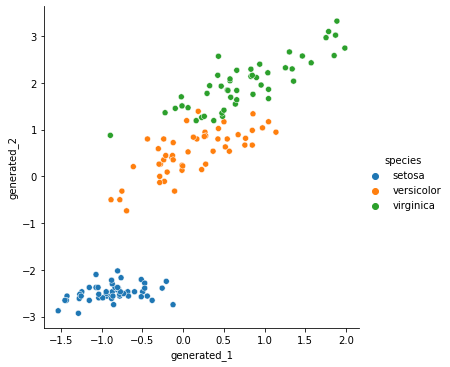

In [111]:
# Plot the generated features to see how well they separate the data
sns.relplot('generated_1', 'generated_2', hue='species', data=generated)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


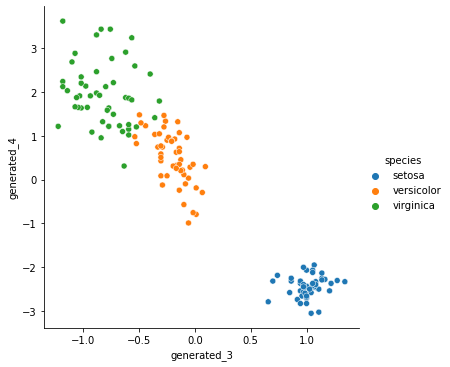

In [113]:
sns.relplot('generated_3', 'generated_4', hue='species', data=generated)

We can see that the generated features do a good job of separating the data. The width and length features separate the data almost perfectly. A good Support Vector Machine could easily capture the data and give execellent classification.

# **Part 3: Outlier Removal**
We shall do outlier removal on the cleaned data set from the Data Cleansing section.

In [116]:
print('*******kurtosis*******')
print(scp.stats.kurtosis(iris_data_clean[iris_data_clean['class'] == 1], fisher = False))
print(scp.stats.kurtosis(iris_data_clean[iris_data_clean['class'] == 2], fisher = False))
print(scp.stats.kurtosis(iris_data_clean[iris_data_clean['class'] == 3], fisher = False))
print('*******standard deviation*******')
print(iris_data_clean[iris_data_clean['class'] == 1].std().values)
print(iris_data_clean[iris_data_clean['class'] == 2].std().values)
print(iris_data_clean[iris_data_clean['class'] == 3].std().values)

*******kurtosis*******
[2.77387878 3.72071046 3.83015685 4.21690135 2.37335706 2.20871582
 0.        ]
[2.43549208 2.56139601 2.92559818 2.51216741 2.28632947 2.10763232
 0.        ]
[2.94974043 3.52525724 2.69199224 2.33865199 2.18810602 2.30680368
 0.        ]
*******standard deviation*******
[0.34800714 0.37998975 0.17329403 0.10826004 0.1391256  0.2980408
 0.        ]
[0.51388877 0.31246423 0.46991098 0.19775268 0.14454996 0.31399362
 0.        ]
[0.6334237  0.32232446 0.5513864  0.27465006 0.12078098 0.28395096
 0.        ]


Looking at the kurtosis values it seems that the setosa class is most prone to outliers especially in the petal width value. Virginica is also prone to outliers but not as much as Setosa. Given how little the data is, I would experiment with removing only the outlier in Setosa.

I will use Confidence Interval Outlier Removal from  Eqn 8 of the Data Processing.pdf. As suggested in the document, I will replace (mu mulower) and (muupper mu) with the standard deviation of the lower and upper samples repectively.

In [117]:
setosa_data = iris_data_clean[iris_data_clean['class'] == 1]
setosa_data.describe()

,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
mean,4.996597,3.420438,1.465753,0.242589,1.394913,2.497021,1.0
std,0.348007,0.379990,0.173294,0.108260,0.139126,0.298041,0.0
min,4.300000,2.300000,1.000000,0.100000,1.147873,1.976229,1.0
25%,4.800000,3.125000,1.400000,0.200000,1.318073,2.283013,1.0
50%,5.000000,3.400000,1.500000,0.200000,1.390489,2.483126,1.0
75%,5.175000,3.675000,1.575000,0.300000,1.505228,2.725139,1.0
max,5.800000,4.400000,1.900000,0.600000,1.685578,3.114562,1.0


In the Setosa data set, given sepal width, petal length and petal width have the highest kurtosis numbers, I'll run the confidence interval outlier detection on those features to see which observations they detect as outliers.

In [114]:
def get_confidence_interval(feature_name, data, alpha):
  means = data.mean()
  upper_data = data[data[feature_name]>means[feature_name]][feature_name]
  lower_data = data[data[feature_name]<means[feature_name]][feature_name]

  lower_bound = lower_data.mean()-(alpha * lower_data.std())
  upper_bound = upper_data.mean()+(alpha * upper_data.std())
  return (lower_bound, upper_bound)


In [118]:
print(get_confidence_interval('sepal width', setosa_data, 0.75))
print(get_confidence_interval('petal length', setosa_data, 0.75))
print(get_confidence_interval('petal width', setosa_data, 0.75))

(2.9959137113973067, 3.952345978932109)
(1.2359049653039855, 1.668694242060844)
(0.1505755662664209, 0.4392261628933256)


Given the confidence intervals I'll retrieve all the observations that do not fit in those bounds for each.

In [119]:
def retrieve_furthest_data_from_bound(bound, data):
  outlier = []
  lowest = None
  lowest_index = None
  highest_index = None
  highest = None
  for index, value in enumerate(data):
    if value<bound[0] or value>bound[1]:
      outlier.append(index)
  return outlier

In [121]:
outlier_indices = retrieve_furthest_data_from_bound( get_confidence_interval('sepal width', setosa_data, .75), setosa_data['sepal width'])
setosa_data.iloc[outlier_indices,:]

,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
8,4.4,2.9,1.4,0.2,1.147873,1.976229,1
14,5.8,4.0,1.2,0.2,1.495580,2.590192,1
15,5.7,4.4,1.5,0.4,1.403405,2.429602,1
32,5.2,4.1,1.5,0.1,1.387303,2.604690,1
33,5.5,4.2,1.4,0.2,1.158511,2.058600,1
41,4.5,2.3,1.3,0.3,1.151527,2.008274,1


In [122]:
outlier_indices = retrieve_furthest_data_from_bound(get_confidence_interval('petal length', setosa_data, 0.75), setosa_data['petal length'])
setosa_data.iloc[outlier_indices,:]

,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
5,5.4,3.9,1.7,0.4,1.325835,2.235803,1
13,4.3,3.0,1.1,0.1,1.314645,2.262849,1
14,5.8,4.0,1.2,0.2,1.495580,2.590192,1
18,5.7,3.8,1.7,0.3,1.432863,2.460808,1
20,5.4,3.4,1.7,0.2,1.426801,2.505443,1
22,4.6,3.6,1.0,0.2,1.318044,2.406205,1
23,5.1,3.3,1.7,0.5,1.481632,2.722306,1
24,4.8,3.4,1.9,0.2,1.364507,2.445792,1
35,5.0,3.2,1.2,0.2,1.538369,2.761824,1
44,5.1,3.8,1.9,0.4,1.507756,2.751912,1


In [123]:
outlier_indices = retrieve_furthest_data_from_bound(get_confidence_interval('petal width', setosa_data, 0.75), setosa_data['petal width'])
setosa_data.iloc[outlier_indices,:]

,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
9,4.9,3.1,1.500000,0.100000,1.401505,2.434789,1
12,4.8,3.0,1.487664,0.100000,1.526365,2.794599,1
13,4.3,3.0,1.100000,0.100000,1.314645,2.262849,1
23,5.1,3.3,1.700000,0.500000,1.481632,2.722306,1
32,5.2,4.1,1.500000,0.100000,1.387303,2.604690,1
34,4.9,3.1,1.500000,0.100000,1.529664,2.726084,1
36,5.5,3.5,1.300000,0.129426,1.188148,2.034879,1
37,4.9,3.1,1.500000,0.100000,1.162525,2.052630,1
43,5.0,3.5,1.600000,0.600000,1.318162,2.210588,1


It looks like there are a bunch of potential candidates if we look at the just the furthest features given the confidence intervals. We shall marry this knowledge with the data points that are furthest from the mean given the mahalanobis distance.

In [124]:
def calcuate_mohalanobis_distance(val, data):
    """ Calculates the Mohalanobis distance of a value from the data mean.
    Args: 
        val: The vale whose distance from the mean we want to calculate.
        data: The data set.
    
    Returns:
        The mahalanobis distance in D^2 form.
    """
    data = np.array(data)
    covariance = np.cov(data, rowvar=False)
    mu = data.mean(axis = 0)
    D = distance.mahalanobis(val, mu, np.linalg.inv(covariance))
    return D * D

In [125]:
from sortedcontainers import SortedDict
from scipy.spatial import distance
def generate_distance_to_observation_mapping(data):
    """ Generates a sorted dictionary of the item's distance from the mean to the observation """
    data = data.drop(columns=['class'])
    [row_count, col_count] = data.shape
    mapping = {}
    for i in range(0, row_count):
        mapping[calcuate_mohalanobis_distance(data.values[i], data.values)] = data.values[i]
    return SortedDict(mapping) 

In [126]:
# Mahalanobis distance sorted in ascending order.
generate_distance_to_observation_mapping(setosa_data)

SortedDict({0.49682610406683214: array([5.        , 3.3       , 1.4       , 0.2       , 1.40796873,
       2.52727721]), 1.3287603022353822: array([5.3       , 3.7       , 1.5       , 0.2       , 1.34392205,
       2.39910648]), 1.5383198338011048: array([5.2       , 3.5       , 1.5       , 0.2       , 1.50648258,
       2.75138141]), 1.8534387118995854: array([5.        , 3.4       , 1.5       , 0.2       , 1.33102778,
       2.2784994 ]), 1.9030249847996752: array([5.        , 3.5       , 1.3       , 0.3       , 1.43258851,
       2.51882525]), 1.9305411447850378: array([5.4       , 3.7       , 1.5       , 0.2       , 1.34057351,
       2.38020317]), 2.7197599213713817: array([4.8       , 3.        , 1.4       , 0.3       , 1.33509099,
       2.33170391]), 2.7803094488073037: array([5.        , 3.6       , 1.4       , 0.2       , 1.50146433,
       2.81560308]), 2.8889053567872893: array([5.1       , 3.4       , 1.5       , 0.2       , 1.41810069,
       2.67417763]), 3.1754549573645

It looks like observation 41 is an outlier as it is outside the confidence interval looking at sepal length and is the furthest from the mean looking at it's mahalanobis distance (it can be located as the last item in the above list with a distance of 15.94). 
<p>We shall take a look at a graph of sepal width to petal length to see if removing item 41 actually removes an outlier.

In [127]:
setosa_data_clean_outlier_removed = setosa_data.drop(41)

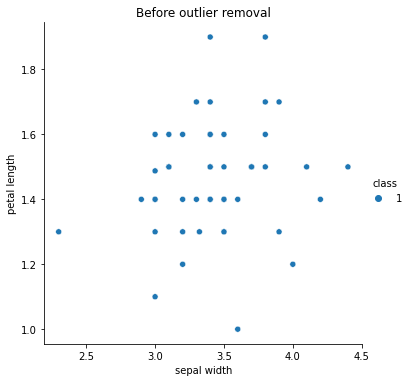

In [136]:
ax = sns.relplot(data=setosa_data, x='sepal width', y='petal length', hue="class")
plt.title('Before outlier removal')
plt.show()

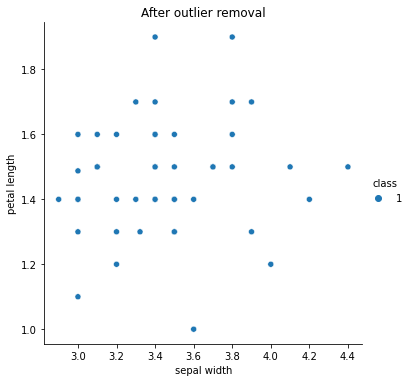

In [137]:
ax = sns.relplot(data=setosa_data_clean_outlier_removed, x='sepal width', y='petal length', hue="class")
plt.title('After outlier removal')
plt.show()

Looks like Item 41 was correctly removed as it was an outlier far to the left of the setosa class interval.

# **Data Analysis**
Do some data analysis on provided iris_6_feature.csv dataset. I will mainly concentrate on new features 1 &2 as we have already provided statistics for the other data in Probilities.pdf.

In [139]:
# Read in six feature iris data from file.
iris_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EN605.621/pa2/iris_6_features.csv')
iris_data.head()

,sepal length,sepal width,petal length,petal width,New Feature 1,New Feature 2,class
0,5.1,3.5,1.4,0.2,1.611281,2.981148,1
1,4.9,3.0,1.4,0.2,1.295847,2.210908,1
2,4.7,3.2,1.3,0.2,1.685578,3.114562,1
3,4.6,3.1,1.5,0.2,1.546064,2.714977,1
4,5.0,3.6,1.4,0.2,1.501464,2.815603,1


In [140]:
print(iris_data[iris_data['class']==1]['New Feature 1'].mean())
print(iris_data[iris_data['class']==2]['New Feature 1'].mean())
print(iris_data[iris_data['class']==3]['New Feature 1'].mean())
print(iris_data[iris_data['class']==1]['New Feature 1'].std())
print(iris_data[iris_data['class']==2]['New Feature 1'].std())
print(iris_data[iris_data['class']==3]['New Feature 1'].std())
print(iris_data[iris_data['class']==1]['New Feature 1'].skew())
print(iris_data[iris_data['class']==2]['New Feature 1'].skew())
print(iris_data[iris_data['class']==3]['New Feature 1'].skew())

1.3949127076800005
1.3663163696799998
1.36125973236
0.13912560387846848
0.14320039145479316
0.1208682912304935
0.04883692802093161
0.5019498960267118
-0.28749320010094237


In [141]:
print(scp.stats.kurtosis(iris_data[iris_data['class']==1]['New Feature 1'], fisher=False))
print(scp.stats.kurtosis(iris_data[iris_data['class']==2]['New Feature 1'], fisher=False))
print(scp.stats.kurtosis(iris_data[iris_data['class']==3]['New Feature 1'], fisher=False))
print(scp.stats.kurtosis(iris_data[iris_data['class']==1]['New Feature 2'], fisher=False))
print(scp.stats.kurtosis(iris_data[iris_data['class']==2]['New Feature 2'], fisher=False))
print(scp.stats.kurtosis(iris_data[iris_data['class']==3]['New Feature 2'], fisher=False))

2.373357056769759
2.323862546352163
2.1618139795437887
2.176690089617361
2.2312166376708777
2.3068036758976938


No outliers in the new data.
The kurtosis values are well below 3 and the standard deviation is minimal for each feature.

# **Part 4: Feature Ranking**

Here we will be using Fisher's Linear Descriminant Ratio.

In [142]:
def calculate_fdr(data, classes):
  fdr = 0
  size = len(classes)
  for i in range(1, size+1):
    for j in range(1, size+1):
      if(j == i):
        continue
      mu_i = data[data['class'] == i].drop(columns = ['class']).values.mean()
      mu_j = data[data['class'] == j].drop(columns = ['class']).values.mean()
      sigma_i = data[data['class'] == i].drop(columns = ['class']).values.std()
      sigma_j = data[data['class'] == i].drop(columns = ['class']).values.std()
      fdr = fdr + (((mu_i - mu_j)**2)/(sigma_i**2 + sigma_j**2))
    
  return fdr

classes = [1, 2, 3]
ranked_feature = {}
for feature in ['sepal length', 'sepal width', 'petal length', 'petal width', 'New Feature 1', 'New Feature 2']:
  ranked_feature[feature] = calculate_fdr(iris_data.loc[:, [feature,'class']], classes)
ranked_feature = sorted(ranked_feature.items(), key=lambda item: item[1], reverse=True)

In [143]:
ranked_feature

[('petal length', 468.40464781577646),
 ('petal width', 239.38590092466657),
 ('New Feature 2', 76.27231219494898),
 ('sepal length', 19.993139845442208),
 ('sepal width', 5.730982256447015),
 ('New Feature 1', 0.11283417845297425)]

Features ranking gives a result of: 

1.   Petal Length
2.   Petal Width
3.   New Feature 2
4.   Sepal Length
5.   Sepal Width
6.   New Feature 1

Petal Length being the best anf New Feature 1 the worst.



# **Part 5: Principal Component Analysis**

In [144]:
data = iris_data.drop(columns=['class']).values
pca = PCA(n_components = 2)
pca.fit(data)
transformed = pca.transform(data)

In [145]:
transformed = pd.DataFrame(data = transformed, columns=['component_1', 'component_2'])

In [146]:
transformed['class'] = iris_data['class']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


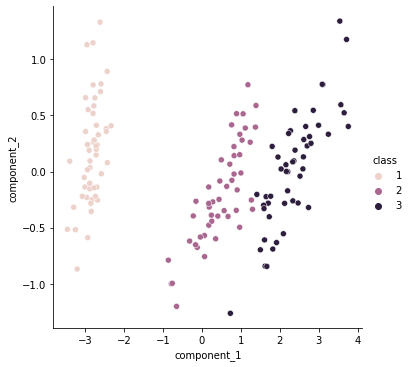

In [147]:
sns.relplot('component_1', 'component_2', hue='class', data=transformed)

# Part 6: Classification

## **Bayes Classifier**

Separate the data into training set and testing set.

In [180]:
from sklearn.model_selection import train_test_split

rows_count, columns_count = iris_data.shape
train_features, test_features, train_classes, test_classes = train_test_split (
    iris_data.values[:, 0: columns_count-1], iris_data.values[:, -1], test_size = 0.2, random_state=42)
print(train_features.shape)
print(test_features.shape)
print(train_classes.shape)
print(test_classes.shape)

(120, 6)
(30, 6)
(120,)
(30,)


Fit this data into the a Normal distribution by using the Gaussian Mixture Model for expectation maximization. We will get the mean and standard deviation for this data and then use the below bayesian classifier.
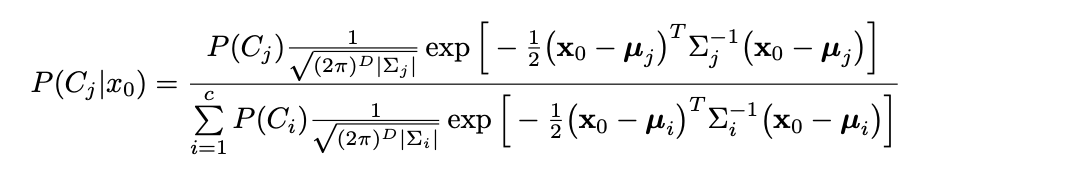

In [181]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3, covariance_type='full')

In [182]:
gmm.fit(train_features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [183]:
gmm.means_

array([[4.99      , 3.44      , 1.4525    , 0.2425    , 1.39842106,
        2.50217287],
       [5.9195122 , 2.77073171, 4.24146341, 1.32195122, 1.34470594,
        3.44992631],
       [6.53333333, 2.96666667, 5.52051282, 2.        , 1.35549102,
        4.55441023]])

Comparing the means with those from the probabilities document we can see that the 0th item is Virginica, the 1st is Setosa and the 2nd is Versicolor.

In [184]:
gmm.covariances_

array([[[ 0.123901  ,  0.1064    ,  0.018275  ,  0.009425  ,
          0.00514132,  0.0124108 ],
        [ 0.1064    ,  0.154901  ,  0.01315   ,  0.01055   ,
          0.00747225,  0.01414549],
        [ 0.018275  ,  0.01315   ,  0.03299475,  0.00601875,
         -0.00112731, -0.00102975],
        [ 0.009425  ,  0.01055   ,  0.00601875,  0.01144475,
          0.00149908,  0.00073136],
        [ 0.00514132,  0.00747225, -0.00112731,  0.00149908,
          0.01940366,  0.03999446],
        [ 0.0124108 ,  0.01414549, -0.00102975,  0.00073136,
          0.03999446,  0.08878048]],

       [[ 0.28693735,  0.09861987,  0.19114218,  0.05908388,
          0.02533252,  0.05615667],
        [ 0.09861987,  0.10011998,  0.09389649,  0.04600833,
          0.01497066,  0.03127207],
        [ 0.19114218,  0.09389649,  0.22584276,  0.07933373,
          0.01017355,  0.02563963],
        [ 0.05908388,  0.04600833,  0.07933373,  0.04122646,
          0.00603754,  0.01227996],
        [ 0.02533252,  0.014

In [185]:
gmm.weights_

array([0.33333333, 0.34166667, 0.325     ])

In [186]:
def bayes_classifier(data, gmm):
  sum = 0
  means = gmm.means_
  cov = gmm.covariances_
  probs = gmm.weights_
  D = 6

  for i in range(0, len(means)):
    term1 = ((2 * math.pi)**D)* np.linalg.det(cov[i])
    term2 = -1/2 * np.dot(np.dot(np.transpose((data - means[i])),  np.linalg.inv(cov[i])) , (data - means[i]))
    sum = sum + (probs[i] * (1/math.sqrt(term1)) * math.exp(term2))

  predicted_probs = []
  for i in range (0, 3):
    term1 = ((2 * math.pi)**D)* np.linalg.det(cov[i])
    term2 = -1/2 * np.dot(np.dot(np.transpose((data - means[i])),  np.linalg.inv(cov[i])) , (data - means[i]))
    predicted_probs.append(probs[i] * (1/math.sqrt(term1)) * math.exp(term2)) 

  return predicted_probs

In [169]:
import operator
# We can understand what each idex represents by using the means we gleaned from the gaussian mixture model.
def get_max(input, flowers):
    index, _ = max(enumerate(input), key=operator.itemgetter(1))
    return flowers[index]

In [187]:
bayes_classifier(test_features[1], gmm)

[0.8436421691085587, 6.996112156641682e-75, 6.351277401604631e-276]

In [193]:
predictions = []
for data in test_features:
  # Please note the flowers positions  array below should correspond with the positions of what mean corresponds to the flower type.
  predictions.append(get_max(bayes_classifier(data, gmm), flowers = [1 , 2, 3]))
accuracy = np.count_nonzero((predictions == test_classes)== True)/len(test_classes)
accuracy

1.0

Bayesian Classifier classifies the data perfectly

## **Parzen Window**

In [172]:
from sklearn.neighbors import KernelDensity

def multi_class_parzen_window(features_by_classes, h):
  ''' Defines a multiclass parzen window.

  Args: 
  features_by_classes: A list of features that are grouped by the target classes.
  h: The bandwidth of the parzen window.
  
  Returns:
  The  KDE for each class.
  '''
  kdfs = []
  for features in features_by_classes:
    kdfs.append(KernelDensity(kernel='gaussian', bandwidth=h).fit(features))
  return kdfs

setosa_features = train_features[np.where(train_classes == 1)]
versicolor_features = train_features[np.where(train_classes == 2)]
virginica_features = train_features[np.where(train_classes == 3)]

kdfs = multi_class_parzen_window([setosa_features, versicolor_features, virginica_features], 0.1)

In [173]:
import operator
def predict(test_features, test_classes, kdfs):
  ''' Predicts the class the test observations belong to using the kernel densities provided. '''
  predictions = []
  for index, feature in enumerate(test_features):
    logs = []
    for kdf in kdfs:
      logs.append(kdf.score_samples(feature.reshape(1, -1))[0])
    prediction = get_max(logs, flowers = [1, 2, 3]);
    predictions.append(prediction)
  return predictions

In [174]:
predictions = predict(test_features, test_classes, kdfs)
accuracy = np.count_nonzero((predictions == test_classes)== True)/len(test_classes)
print('accuracy: ', accuracy)

accuracy:  1.0


Parzen window classifies the data perfectly.

## **Support Vector Machines**

In [175]:
from sklearn import svm
# Create SVM and fit the training set.
clf_ovr = svm.SVC()
clf_ovr.fit(train_features, train_classes)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [176]:
predictions = clf_ovr.predict(test_features)

In [177]:
print(test_classes)
print(predictions)

[2. 1. 3. 2. 2. 1. 2. 3. 2. 2. 3. 1. 1. 1. 1. 2. 3. 2. 2. 3. 1. 3. 1. 3.
 3. 3. 3. 3. 1. 1.]
[2. 1. 3. 2. 2. 1. 2. 3. 2. 2. 3. 1. 1. 1. 1. 2. 3. 2. 2. 3. 1. 3. 1. 3.
 3. 3. 3. 3. 1. 1.]


In [178]:
accuracy = np.count_nonzero((test_classes == predictions) == True)/len(test_classes)
print("prediction accuracy:", accuracy)

prediction accuracy: 1.0


Support Vector Machines classifies the data perfectly